In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns


In [2]:
base = pd.read_csv('../../../Data/BaseData.csv')

In [3]:
Ridge = Ridge()

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

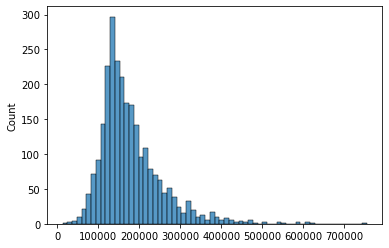

In [5]:
sns.histplot(y);

In [6]:
ylog = np.log10(y)

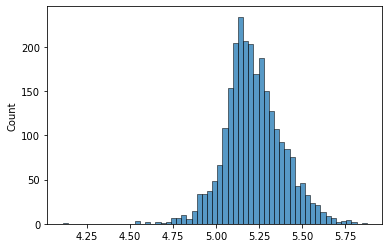

In [7]:
sns.histplot(ylog);

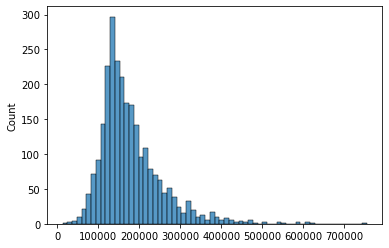

In [8]:
sns.histplot(10**ylog);

In [9]:
AR2_Base = []
MAE_Base = []
pred_list = []
pred_USD = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X,ylog,test_size=0.25)
    Ridge.fit(X_train, y_train)
    pred = Ridge.predict(X_test)
    
    pred_list.append(pred)
    pred_USD.append(10**pred)
    
    Adj_r2 = 1 - (1-r2_score(10**y_test, 10**pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    mae = mean_absolute_error(10**y_test, 10**pred)
    MAE_Base.append(mae)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.2713e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.82663e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.79878e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.2453e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgW

In [10]:
base

,Unnamed: 0,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConL

In [11]:
X[0:10]

array([[  0.,   0.,   0., ..., 166.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  2.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  7.,   0.,   0., ...,   0.,   0.,   0.],
       [  8.,   0.,   0., ...,   0.,   0.,   0.],
       [  9.,   0.,   0., ...,   0.,   0.,   0.]])

In [12]:
ylog[0:10]

array([5.10037055, 5.14457421, 5.09656244, 5.05690485, 5.35602586,
       5.29776051, 4.96848295, 5.27343419, 5.1383027 , 5.14612804])

In [13]:
X_train[0:10]

array([[ 887.,    0.,    0., ...,    0.,    0.,    0.],
       [1923.,    0.,    0., ...,  225.,    0.,    0.],
       [ 372.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [2381.,    0.,    0., ...,    0.,    0.,    0.],
       [1682.,    0.,    0., ...,    0.,    0.,    0.],
       [2349.,    0.,    0., ...,    0.,    0.,    0.]])

In [14]:
X_test[0:10]

array([[1296.,    0.,    0., ...,    0.,    0.,    0.],
       [1233.,    0.,    0., ...,    0.,    0.,    0.],
       [1085.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [ 694.,    0.,    0., ...,    0.,    0.,    0.],
       [ 307.,    0.,    0., ...,  140.,    0.,    0.],
       [2320.,    0.,    0., ...,    0.,    0.,    0.]])

In [15]:
y_train[0:10]

array([5.26717173, 4.98632378, 5.07918125, 5.28409219, 5.33645973,
       4.83569057, 5.        , 5.12385164, 5.36172784, 5.45101845])

In [16]:
y_test[0:10]

array([5.19589965, 4.78532984, 5.12057393, 5.2367891 , 5.23044892,
       5.11025292, 5.50514998, 5.15075644, 5.17026172, 5.22141424])

In [17]:
10**y_test[0:10]

array([157000.,  61000., 132000., 172500., 170000., 128900., 320000.,
       141500., 148000., 166500.])

In [18]:
pred[0:10]

array([5.18373278, 4.70878147, 5.15223036, 5.20848839, 5.23288538,
       5.09488624, 5.474992  , 5.11613284, 5.16841041, 5.24235511])

In [19]:
10**pred[0:10]

array([152662.64414232,  51142.4425994 , 141981.04218241, 161617.50115832,
       170956.40541598, 124418.86502363, 298532.76485068, 130657.0467316 ,
       147370.45057188, 174725.02435934])

In [27]:
type(pred_list)

list

In [28]:
pred_list[0:1]

[array([5.34739382, 5.27178201, 4.88609897, 5.29959437, 5.22105834,
        5.36949648, 5.15142653, 5.31628646, 5.20115682, 5.10321944,
        5.13793217, 5.48507082, 5.22033873, 5.24966554, 5.46097612,
        5.18881411, 5.48573652, 5.01311093, 5.32990929, 5.07356005,
        5.33414467, 5.21920022, 4.90809208, 5.15610001, 5.09278493,
        5.01706737, 5.20079915, 5.17870814, 4.93345738, 4.99560851,
        5.10228154, 5.15310834, 5.41726511, 5.39808001, 5.42935755,
        5.39129609, 5.37741929, 5.410174  , 5.15268473, 5.14656142,
        5.2016188 , 5.07125274, 5.09165484, 5.21351262, 5.32655994,
        5.20736115, 5.09622639, 5.15577039, 5.2873517 , 5.36800795,
        4.7873116 , 5.12614166, 5.07697342, 5.21993005, 5.32054795,
        5.34357634, 5.54116114, 5.24385165, 4.98861399, 5.05435993,
        5.05175825, 5.40412674, 5.40284919, 5.37235275, 5.13567773,
        5.18492476, 5.41285156, 5.14353284, 5.04101944, 5.37452993,
        5.27941391, 5.39374328, 5.49163714, 5.13

In [29]:
pred_USD[0:1]

[array([222532.69088853, 186974.34058371,  76930.57372061, 199339.96138996,
        166363.6103747 , 234151.25020184, 141718.49298885, 207150.72618541,
        158912.04521934, 126829.25420426, 137382.74035594, 305541.93490799,
        166088.18192651, 177691.04427555, 289052.09196766, 154459.31657936,
        306010.63786317, 103064.93375961, 213751.55915367, 118456.81485662,
        215846.33005304, 165653.34977832,  80926.74611416, 143251.77383118,
        123818.3273901 , 104008.14918177, 158781.22538956, 150906.56827488,
         85794.09175809,  98993.91614001, 126555.64905865, 142268.36383634,
        261375.64277612, 250080.60424602, 268755.61492924, 246204.56070516,
        238462.05878989, 257142.58058916, 142129.66531044, 140139.77478645,
        159081.17978327, 117829.14789526, 123496.55518777, 163498.06552987,
        212109.41045649, 161198.55676022, 124803.39123852, 143143.08917784,
        193799.07394467, 233350.07794949,  61278.99055471, 133703.15779046,
        1193

In [22]:
AR2_Base[0:10]

[0.9263225988238902,
 0.7314578627366928,
 0.9370125963375795,
 0.9450640187745097,
 0.9271660625714825]

In [23]:
MAE_Base[0:10]

[12490.637927720962,
 14393.183808161295,
 12057.727401850272,
 12284.688770578841,
 11807.118460908101]

In [39]:
[((np.mean(np.abs(x1 - x2)))/100) for (x1, x2) in zip(pred_list, pred_USD)]

[1755.3371637097089,
 1800.3691581610362,
 1745.6411376331237,
 1777.3962956136688,
 1758.6626232685064]

In [40]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Base

,AR2_Base,MAE_Base
0,0.926323,12490.637928
1,0.731458,14393.183808
2,0.937013,12057.727402
3,0.945064,12284.688771
4,0.927166,11807.118461


In [41]:
Base.describe()

,AR2_Base,MAE_Base
count,5.000000,5.000000
mean,0.893405,12606.671274
std,0.090858,1030.702137
min,0.731458,11807.118461
25%,0.926323,12057.727402
50%,0.927166,12284.688771
75%,0.937013,12490.637928
max,0.945064,14393.183808
